In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')


In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,2,174


In [5]:
df.shape

(3803, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [7]:
df.duplicated().sum()

126

In [9]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,2,174


In [10]:
# 1. Property_type

<Axes: xlabel='property_type'>

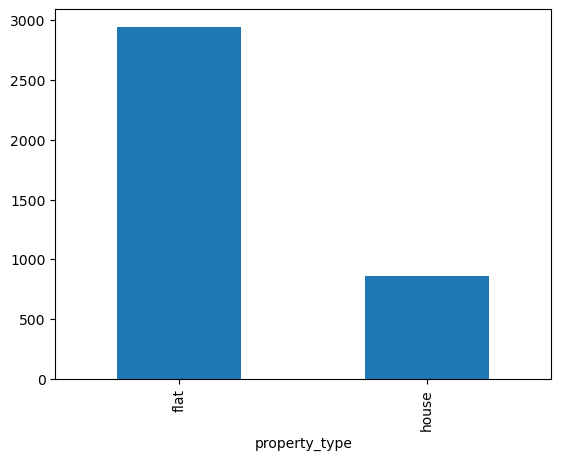

In [11]:
df['property_type'].value_counts().plot(kind='bar')

### Observations
- flats are in majority i.e. 75% and there are less no. of independent houses
- No missing values

## society

In [12]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                74
shapoorji pallonji joyville gurugram       45
dlf new town heights                       42
                                         ... 
samadhan shri kamal cghs                    1
private house                               1
elevate                                     1
dlf pink town house                         1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [19]:
df[df['society']!= 'independent']['society'].value_counts(normalize=True).cumsum().head(50)

society
tulip violet                            0.022618
ss the leaf                             0.044934
shapoorji pallonji joyville gurugram    0.058504
dlf new town heights                    0.071170
signature global park                   0.082328
shree vardhman victoria                 0.092883
smart world gems                        0.102835
smart world orchard                     0.112786
emaar mgf emerald floors premier        0.122437
dlf the ultima                          0.131785
paras dews                              0.141134
dlf regal gardens                       0.150181
m3m woodshire                           0.159228
shree vardhman flora                    0.167973
la vida by tata housing                 0.176417
signature global solera                 0.184560
godrej nature plus                      0.192702
emaar gurgaon greens                    0.200241
bptp terra                              0.207780
vatika gurgaon                          0.215018
eldeco accol

In [25]:
society_counts = df['society'].value_counts()

# freq dist for society
freq_bins = {
    'Very High(>100)': (society_counts>100).sum(),
    'High (50-100)': ((society_counts>=50) & (society_counts<=100)).sum(),
    'average(10-49)': ((society_counts>9) & (society_counts<50)).sum(),
    'Low(2-9)': ((society_counts>=2) & (society_counts<=9)).sum(),
    'very low(1)': (society_counts==1).sum()
}
freq_bins

{'Very High(>100)': 1,
 'High (50-100)': 2,
 'average(10-49)': 97,
 'Low(2-9)': 285,
 'very low(1)': 291}

<Axes: xlabel='society'>

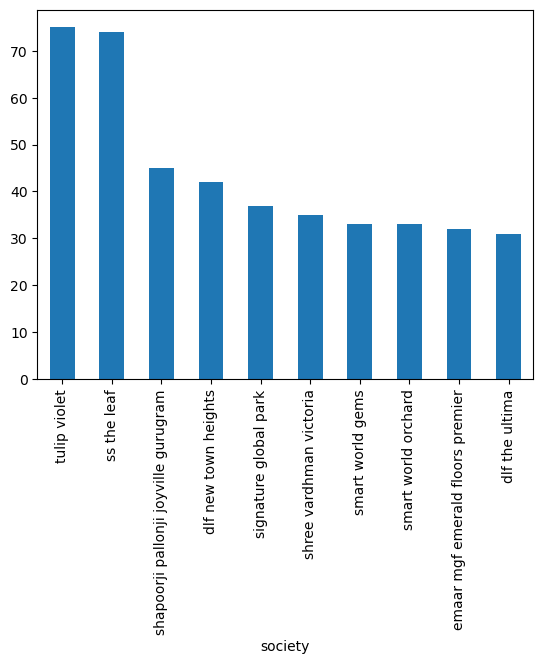

In [41]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [40]:
1+2+92+273+308

676

In [38]:
society_counts

society
independent                               486
tulip violet                               75
ss the leaf                                74
shapoorji pallonji joyville gurugram       45
dlf new town heights                       42
                                         ... 
samadhan shri kamal cghs                    1
private house                               1
elevate                                     1
dlf pink town house                         1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [37]:
society_counts[society_counts <= 1]

society
shree balaji appartment                   1
shreeram apartment ii                     1
.                                         1
aardhya homesh                            1
ild grand centra                          1
                                         ..
samadhan shri kamal cghs                  1
private house                             1
elevate                                   1
dlf pink town house                       1
surendra homes dayaindependentd colony    1
Name: count, Length: 291, dtype: int64

In [21]:
society_counts.sum()

3802

In [6]:
col_names = df.columns

In [9]:
df.columns = col_names.str.lower()

In [10]:
df

,property_type,society,sector,price,price_per_sqft,area,areawithtype,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,...,583.0,NaN,483.0,0,0,0,0,0,0,73
3799,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5,5,3+,...,NaN,6228.0,NaN,1,1,1,1,0,0,160
3800,flat,ansal api celebrity suites,sector 2,0.60,8163.0,735.0,Super Built up area 735(68.28 sq.m.),1,1,1,...,735.0,NaN,NaN,0,0,0,0,0,2,67
3801,house,independent,sector 43,15.50,28233.0,5490.0,Plot area 610(510.04 sq.m.),5,6,3,...,NaN,5490.0,NaN,1,1,1,1,0,0,76
